# COGS 108 - College Ranking Analysis

# Names

- Frans Timothy Juacalla
- Clarissa Elbo
- Ning Chen
- Marco Morocho

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [X] NO - keep private

# Overview

With thousands of universities across the country to choose from, many incoming students consider applying to universities based on the schools’ rankings. Although university ranking seems to be highly regarded by many applicants, it is not always clear how universities are ranked, and what factors are being considered. By analyzing different attributes of a university, including location, private vs public, cost, population, ACT & SAT scores, and demographic, our project investigates which attributes primarily affect the ranking of a university, and how a school’s demographic affects its ranking. In this project, we merged two datasets,  America's Top College Rankings 2019 and College Admissions, to investigate what attributes primarily affect the ranking of a university. We also investigate whether the university rankings are in any way biased towards certain ethnic and demographic groups

<a id='research_question'></a>
# Research Questions

- **What features or attributes primarily affect the ranking of a university compared to other universities? For instance, how do factors such as location and cost of attendance contribute to the ranking?**  
- **Which model is best to predict rank?**   
- **Are university rankings racially biased? Do less racially diverse universities rank better than diverse ones?**

<a id='background'></a>

## Background & Prior Work

There are several university ranking lists available, each using a different ranking methodology to calculate the universities’ rankings. Forbes list of America’s Top Colleges, a college ranking list that is considered to be one of the most accurate, calculated their rankings based on alumni salary, student satisfaction, student experience, American leader list, Academic success and on-time graduation rates. 

In this report,university’s location, school type (private or public), cost, population, or demographic were not being considered. However, these attributes are believed to be tightly associated with the students’ overall experience and satisfaction, which are factors that have direct impacts on the university’s ranking. 

In terms of racial biases, a report from Center for American Progress shows that black and hispanic students are generally less likely to attend four-year university compared with white students, they are also less likely to attend institutions with higher tuition fees. According to an article from Brookings, this racial disparity is likely a result of unequal access to key educational resources for minority children. As most higher ranking universities require higher SAT scores, children with less educational resources are less likely to achieve the admission requirement to enter the higher ranking universities. 

Forbes’ America’s Top Colleges 2019 https://www.forbes.com/top-colleges/#461085761987 

14 Things That Will Affect Your Student Experience More Than You Think https://www.oxford-royale.com/articles/14-things-affect-student-experience/

Unequal Opportunity: Race and Education
https://www.brookings.edu/articles/unequal-opportunity-race-and-education/

The Racist Beginnings of Standardized Testing
https://www.nea.org/advocating-for-change/new-from-nea/racist-beginnings-standardized-testing

# Hypothesis


University’s ranking are affected by factors such as the school’s location, cost, population, etc, as they could directly impact the students’ school experience and satisfaction. University rankings are likely to be racially biased due to the existing racial disparity in higher education and the admission requirements of elite universities being unfavored to the minority groups.

# Dataset(s)

- Dataset Name: America's Top College Rankings 2019 (Forbes)
- Link to the dataset: https://www.kaggle.com/chris95cam/forbes-americas-top-colleges-2019
- Number of observations: 650


This dataset contains the ranking of 650 colleges in the United States and other information about each college, including location, student population, total annual cost, etc.


- Dataset Name: College Admissions
- Link to the dataset: https://www.kaggle.com/samsonqian/college-admissions
- Number of observations: 1517


This dataset consists of information about 1517 colleges, including their number of applicants, student enrollment, distribution of student population based on gender and ethnicity, and standardized test scores.


The college admissions dataset will be merged with the college rankings. In particular, we plan on choosing the columns that fit our analysis. To  combine them, we plan on using df.merge(..., how = ‘inner’), getting columns from our primary, and matching columns from the second. 


# Setup

In [1]:
## import libraries, modules, etc
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.svm import SVC


# Data Cleaning

The 2019 ranking dataset is stored in **ranking** and the college admissions dataset is stored in the variable **admissions**.

The ranking dataset is inner merged with the admissions dataset, which yielded 442 observations. We created an inner merge since we needed both the ranking data and the admissions data, with the ranking data obviously having more importance. This however resulted in a smaller dataset compared to the 650 observations that the ranking dataset originally had. Regardless, we still have more than enough observations to work with.

In [2]:
admissions = pd.read_csv('college_admissions.csv') # college admission dataset
ranking = pd.read_csv('rankings.csv') # 2019 ranking dataset

In [3]:
admissions.head()

,Name,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,Alabama A & M University,6142.0,5521.0,1104.0,15.0,88.0,370.0,450.0,350.0,450.0,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,University of Alabama at Birmingham,5689.0,4934.0,1773.0,6.0,93.0,520.0,640.0,520.0,650.0,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,Amridge University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,University of Alabama in Huntsville,2054.0,1656.0,651.0,34.0,94.0,510.0,640.0,510.0,650.0,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,Alabama State University,10245.0,5251.0,1479.0,18.0,87.0,380.0,480.0,370.0,480.0,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [4]:
ranking.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu


In [5]:
df = ranking.merge(admissions, on='Name', how='inner') # left merge to mainting all rankings 
df = df.drop_duplicates(subset=['Name']) # two duplicates resulting from admissions dataset join

Since the resulting merge resulted in 124 columns, it was essential to remove the columns that are irrelevant or redundant. Our group determined and decided to keep the columns that are relating to test scores, racial demographics (proportions of each ethnicity/race) , geographical locations, financial data, and admissions related data. Our group ended up with 37 columns to work with.



In [6]:
bool_arr = ['total' in i.lower() for i in df.columns] # columns with total are included 
bool_arr[0:16] = [True] * 16 # first 16 columns included 

used_cols = df.loc[:, bool_arr] # the dataframe potentially to be used, should be reduced further
final = (
    used_cols
    .drop(columns = [used_cols.columns[10]] 
          + used_cols.columns[18:20].tolist() 
          + used_cols.columns[25:27].tolist())
) ## 37 columns are kept


With the code below, we cleaned the data types for each column. We found that most columns are of the proper data type and that the only one that needed changing was the College Ranking itself. As such, we change its type from float to integer. 

With the info() function call below, we could see how much missingness is in our combined dataset. We found that our dataset didn't have much missing observations, with the exception of SAT and ACT scores.


In [7]:
final.loc[:, 'Rank'] = used_cols['Rank'].astype(int)  # change the Rank type to int

final.info()
# remove, impute missing values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 443
Data columns (total 37 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Rank                                                                            442 non-null    int64  
 1   Name                                                                            442 non-null    object 
 2   City                                                                            442 non-null    object 
 3   State                                                                           442 non-null    object 
 4   Public/Private                                                                  442 non-null    object 
 5   Undergraduate Population                                                        442 non-null    float64
 6   Student Population

Finally, our group checked the dataset for any weird or unusual values. We found that the dataset didn't contain any such thing as seen below. For instance, columns regarding demographic percentages had reasonable values, with observations lying between the range of 0 to 100, as percentages should be. Therefore, there was no need for any tranformations or changes to the data.

In [8]:
pd.set_option('display.max_columns', None) # Just displays all the columns

final.describe() # judging by the summary stats below, there's no need to modify values

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Applicants total,Admissions total,"Estimated undergraduate enrollment, total","Estimated freshman undergraduate enrollment, total","Estimated graduate enrollment, total",Percent admitted - total,Admissions yield - total,Total enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,441.000000,366.000000,366.000000,373.000000,373.000000,438.000000,438.000000,441.000000,441.000000,420.000000,438.000000,438.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,326.873303,8053.357466,9858.445701,23818.776018,22255.036199,52312.180995,61.668934,1116.286885,1312.035519,23.493298,28.568365,9070.342466,4765.630137,6958.643991,1334.560091,2457.600000,59.931507,29.817352,9349.775510,0.335601,4.809524,7.392290,7.512472,0.045351,65.068027,2.859410,5.460317,6.315193,4.947846,55.621315,54.501134,65.988662,68.585034
std,190.313948,9884.598752,11691.904106,7466.094362,11466.512458,12758.513604,22.660221,134.661574,117.100572,3.863683,3.008727,9227.790209,4637.068765,8024.307207,1346.563738,3696.199917,20.736438,12.916506,10748.373745,1.211996,4.603852,9.606477,6.176234,0.208310,15.704223,1.670114,5.694007,6.007417,4.651930,12.949180,21.359810,16.215239,14.506195
min,1.000000,185.000000,390.000000,1298.000000,3597.000000,8646.000000,5.000000,870.000000,1080.000000,15.000000,22.000000,232.000000,176.000000,271.000000,47.000000,0.000000,6.000000,8.000000,260.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,32.000000
25%,164.250000,1864.250000,2118.500000,18501.000000,10641.000000,42020.250000,49.000000,1020.000000,1230.000000,21.000000,26.000000,3057.000000,1740.250000,1820.000000,453.000000,100.000000,48.250000,20.000000,2061.000000,0.000000,2.000000,3.000000,4.000000,0.000000,56.000000,2.000000,2.000000,2.000000,2.000000,51.000000,40.000000,56.000000,58.000000
50%,326.500000,3618.000000,4501.000000,23657.500000,22449.000000,53267.000000,67.000000,1080.000000,1290.000000,22.000000,28.000000,5526.500000,3056.500000,3241.000000,756.000000,1056.000000,64.000000,27.000000,4537.000000,0.000000,3.000000,5.000000,6.000000,0.000000,68.000000,3.000000,4.000000,5.000000,3.000000,56.000000,56.000000,66.000000,68.000000
75%,486.750000,10202.000000,13834.250000,29014.250000,29622.250000,63422.000000,79.000000,1188.750000,1380.000000,25.000000,30.000000,11499.750000,6218.750000,9182.000000,1674.000000,3434.250000,74.000000,36.750000,12757.000000,0.000000,6.000000,8.000000,9.000000,0.000000,77.000000,4.000000,7.000000,8.000000,6.000000,60.000000,70.000000,79.000000,79.000000
max,650.000000,65100.000000,75044.000000,43965.000000,50897.000000,75735.000000,98.000000,1530.000000,1590.000000,34.000000,35.000000,57845.000000,35815.000000,51269.000000,8061.000000,30599.000000,100.000000,91.000000,77338.000000,22.000000,32.000000,96.000000,62.000000,1.000000,92.000000,9.000000,42.000000,46.000000,33

With data cleaning done, the dataset we ended up with has a shape of 442 rows and 37 columns

In [9]:
final.shape

(442, 37)

In [10]:
final.head()

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Applicants total,Admissions total,"Estimated undergraduate enrollment, total","Estimated freshman undergraduate enrollment, total","Estimated graduate enrollment, total",Percent admitted - total,Admissions yield - total,Total enrollment,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,1,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,5.0,1460.0,1590.0,32.0,35.0,35023.0,2047.0,10542.0,1659.0,18233.0,6.0,81.0,28297.0,0.0,13.0,5.0,7.0,0.0,45.0,3.0,5.0,21.0,13.0,49.0,87.0,95.0,97.0
1,2,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,5.0,1390.0,1540.0,32.0,35.0,38828.0,2208.0,7061.0,1674.0,11156.0,6.0,76.0,18346.0,0.0,15.0,4.0,10.0,0.0,38.0,6.0,6.0,20.0,15.0,43.0,76.0,92.0,96.0
2,3,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,7.0,1460.0,1580.0,32.0,35.0,28977.0,2043.0,5310.0,1300.0,6650.0,7.0,66.0,12109.0,0.0,13.0,5.0,7.0,0.0,48.0,4.0,3.0,18.0,13.0,49.0,90.0,96.0,98.0
3,4,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,7.0,1490.0,1570.0,33.0,35.0,18989.0,1548.0,4528.0,1115.0,6773.0,8.0,72.0,11301.0,0.0,16.0,3.0,9.0,0.0,34.0,3.0,5.0,29.0,16.0,37.0,84.0,91.0,93.0
4,5,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,6.0,1430.0,1570.0,31.0,35.0,26499.0,1963.0,5248.0,1284.0,2714.0,7.0,65.0,8014.0,0.0,15.0,6.0,7.0,0.0,45.0,4.0,4.0,20.0,15.0,45.0,88.0,95.0,97.0


***

In [11]:
final = final.drop(columns = [final.columns[24], final.columns[27]]) # Dropping redundant rows 

We changed the column names to be more appropriate and standardized.

In [12]:
new_cols = (
    ['rank', 'name', 'city', 'state', 'public_private', 'undergrad_pop', 'student_pop', 'price',
     'avg_aid', 'total_cost', 'acceptance_rate', 'sat_lower', 'sat_upper', 'act_lower', 'act_upper',
     'total_applicants', 'total_admissions', 'undergrad_enrollment', 'freshman_enrollment', 'graduate_enrollment',
     'percent_admitted', 'admissions_yield',  'total_enrollment', 'percent_native_american',
     'percent_black', 'percent_latino', 'percent_white', 'percent_multiracial',
     'percent_unknown', 'percent_nonresident', 'percent_asian', 'percent_women',
     'grad_4', 'grad_5', 'grad_6']
)

final.columns = new_cols


# EDA

In [13]:
final.set_index('rank', drop=True).name[:25] # Top 25 available school rankings

rank
1                        Harvard University
2                       Stanford University
3                           Yale University
4     Massachusetts Institute of Technology
5                      Princeton University
6                University of Pennsylvania
7                          Brown University
8        California Institute of Technology
9                           Duke University
10                        Dartmouth College
11                       Cornell University
12                           Pomona College
15                    Georgetown University
16                    University of Chicago
17                  Northwestern University
18                 University of Notre Dame
19                         Williams College
21                          Rice University
22                 Johns Hopkins University
23                      Harvey Mudd College
25                       Swarthmore College
26                          Bowdoin College
27                    Vande

### Most Frequent States
We sorted the colleges by which states they were located in and how frequently these states showed up within the rankings. Most top ranked colleges are located in New York, Pennsylvania, and California.

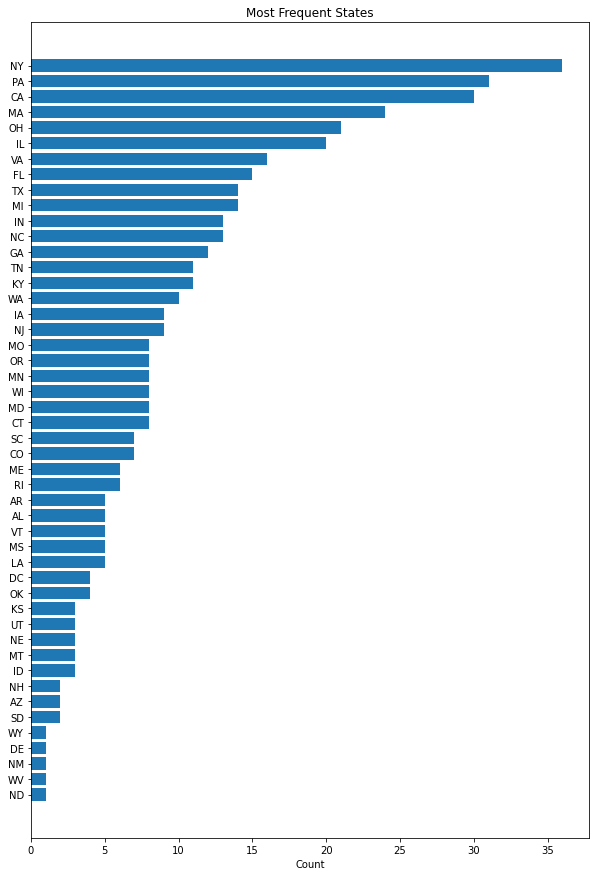

In [14]:
plt.rcParams["figure.figsize"] = (10,15)
state_counts = final.state.value_counts()
plt.barh(state_counts.index[::-1],state_counts[::-1])
plt.title('Most Frequent States'); plt.xlabel('Count')
plt.show()

### Proportion of Private vs. Public Schools
The colleges were sorted by public and private schools and compared against the top 25 colleges. Most of the colleges on the college ranking list are private schools, with the top 25 being all private.

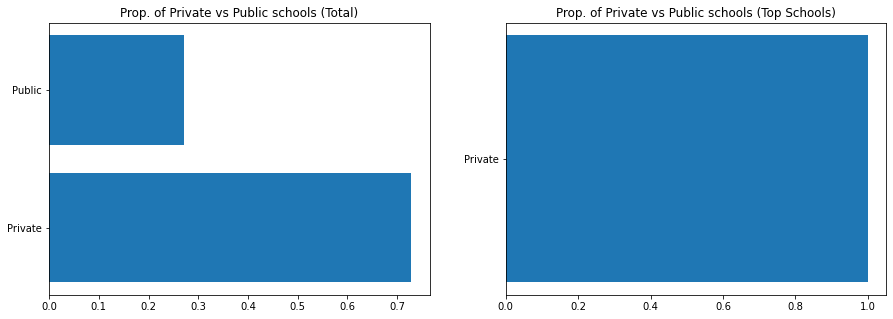

Private    1.0
Name: public_private, dtype: float64

In [15]:
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 2)
pop_cnt = final.public_private.value_counts(normalize=True)
top_cnt = final.public_private[:25].value_counts(normalize=True)
ax[0].barh(pop_cnt.index, pop_cnt); ax[0].set_title('Prop. of Private vs Public schools (Total)')
ax[1].barh(top_cnt.index, top_cnt); ax[1].set_title('Prop. of Private vs Public schools (Top Schools)')
plt.show()

top_cnt

### Total Cost
We plotted the total cost of each college against its rank to see if there would be a pattern. The higher ranking schools tend to be more expensive than the lower ranking ones.

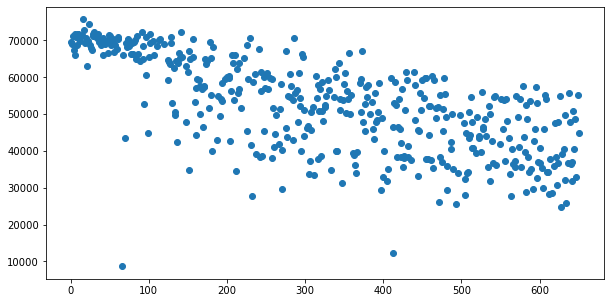

In [16]:
# total cost 
plt.rcParams["figure.figsize"] = (10, 5)
cost = final.set_index('rank', drop=True).total_cost
plt.scatter(cost.index, cost)

### Population
The population of each college was plotted against its rank to see if there would be any relationship.

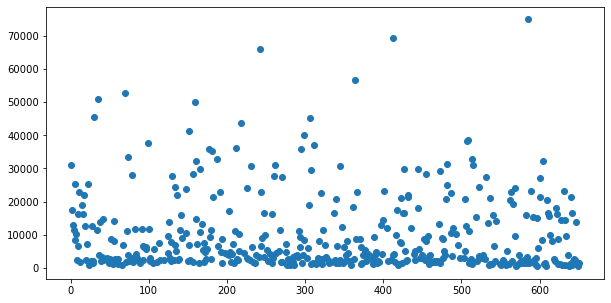

In [17]:
# population 
plt.rcParams["figure.figsize"] = (10, 5)
population = final.set_index('rank', drop=True).student_pop
plt.scatter(population.index, population)

### Undergraduate Population
The population density across all the colleges was plotted to see if there would be a pattern.

<AxesSubplot:ylabel='Density'>

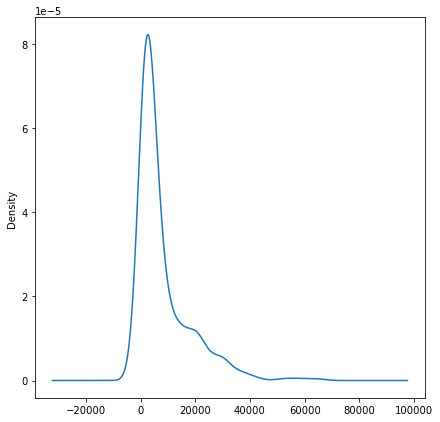

In [18]:
plt.rcParams["figure.figsize"] = (7,7)
final.undergrad_pop.plot(kind='kde')

### ACT and SAT Scores
We compared the middle scores of the ACT and SAT of each college based on the rank. The colleges with the higher rankings tend to require higher ACT and SAT scores.

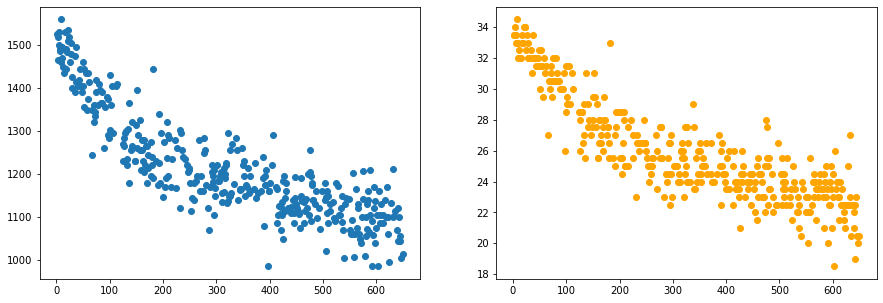

In [19]:
# ACT and SAT scatterplots relative to rank

copy = final.copy().set_index('rank')
sat_middle = (copy.sat_lower + copy.sat_upper) / 2
act_middle = (copy.act_lower + copy.act_upper) / 2

plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots(1, 2)

ax[0].scatter(sat_middle.index, sat_middle)
ax[1].scatter(act_middle.index, act_middle, color='orange')

### Demographics
Lastly, we attempted to show at how universities and the real-world population compared to get a better understanding of the diversity/demographics.

In [20]:
demographics = final.set_index('rank')[['percent_white', 'percent_black', 'percent_asian','percent_latino', 'percent_multiracial','percent_native_american']]
demographics.mean()

percent_white              65.068027
percent_black               7.392290
percent_asian               4.947846
percent_latino              7.512472
percent_multiracial         2.859410
percent_native_american     0.335601
dtype: float64

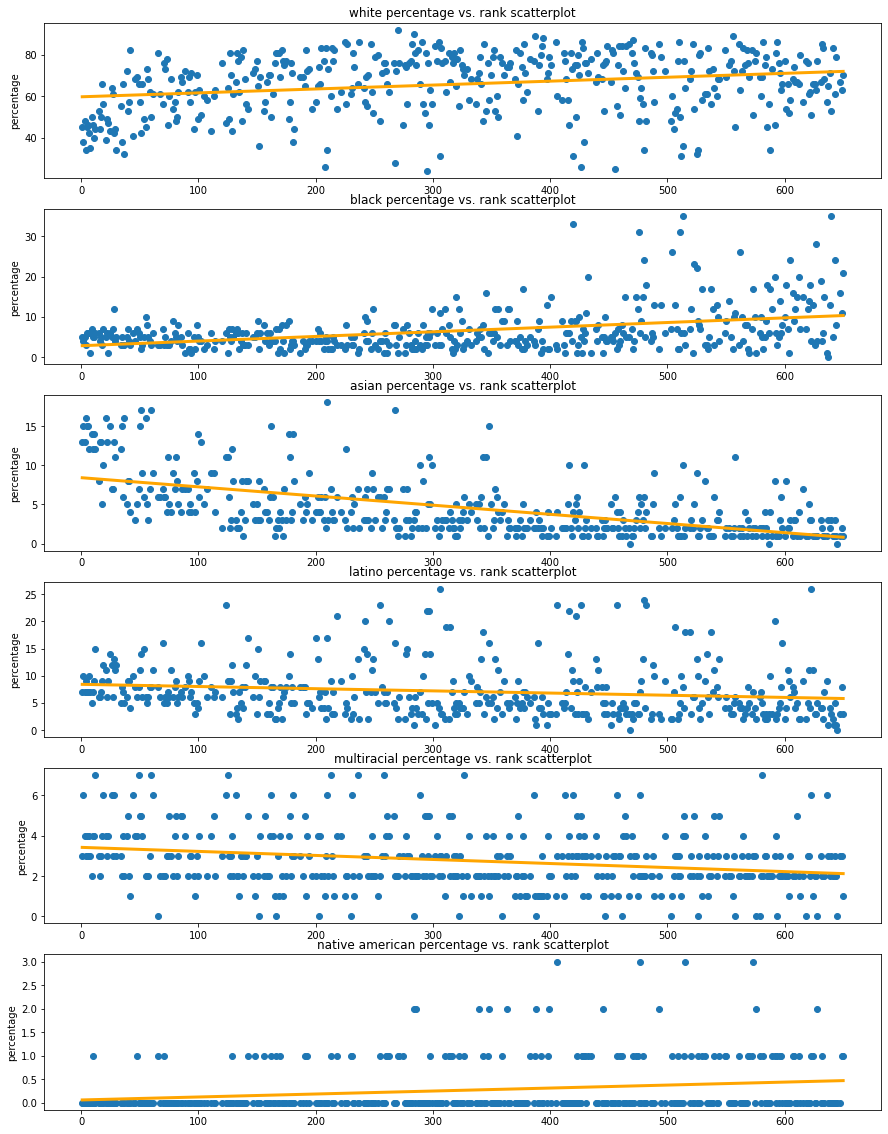

In [21]:
cols = ['percent_white', 'percent_black', 'percent_asian','percent_latino', 'percent_multiracial','percent_native_american']
plt.rcParams["figure.figsize"] = (15, 20)
fig, ax = plt.subplots(len(cols), 1)
for i,j in enumerate(cols):
    pct_eth = final[[j,'rank']].dropna()
    z_score = (pct_eth[j] - np.mean(pct_eth[j])) / np.std(pct_eth[j])
    pct_eth = pct_eth[np.abs((pct_eth[j] - np.mean(pct_eth[j])) / np.std(pct_eth[j])) <= 3]
    
    mdl = Pipeline([('lin-reg', LinearRegression())])
    mdl.fit(pct_eth[['rank']], pct_eth[j])
    
    pts = mdl.predict(pct_eth[['rank']])
    pct_eth1 = pct_eth.set_index('rank')[j]
    
    ax[i].scatter(pct_eth1.index, pct_eth1)
    ax[i].plot(pct_eth['rank'], pts, color='orange', linewidth=3)
    ax[i].set_title(' '.join(j.split('_')[1:]) + ' percentage vs. rank scatterplot')
    ax[i].set_ylabel('percentage')
plt.show()


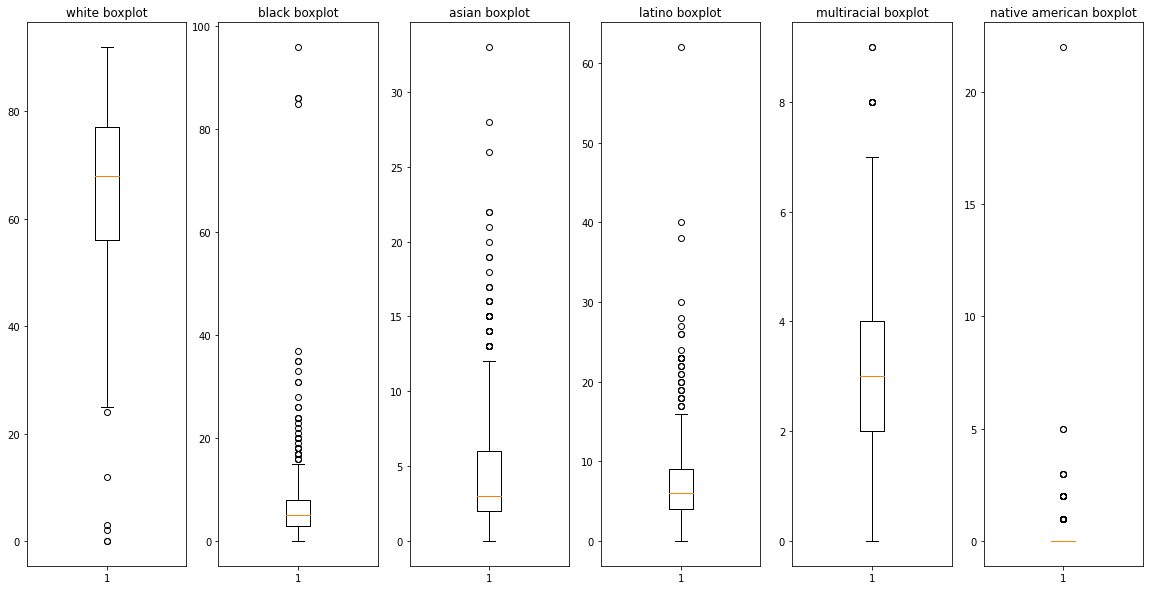

In [22]:
cols = ['percent_white', 'percent_black', 'percent_asian','percent_latino', 'percent_multiracial','percent_native_american']
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots(1,len(cols))

for i,j in enumerate(cols):
    pct_eth = final[j]
    ax[i].boxplot(final[j].dropna().to_numpy())
    ax[i].set_title(' '.join(j.split('_')[1:]) + ' boxplot')

plt.show()

We generated a custom scatter matrix to easily find other strong associations (besides the ones we already found above, such as sat scores, act scores, cost, public/private) between rank and the other numerous columns. From the graphs below, it seems that graduation rates for 4th, 5th, and 6th years have strong relationship with school ranking.

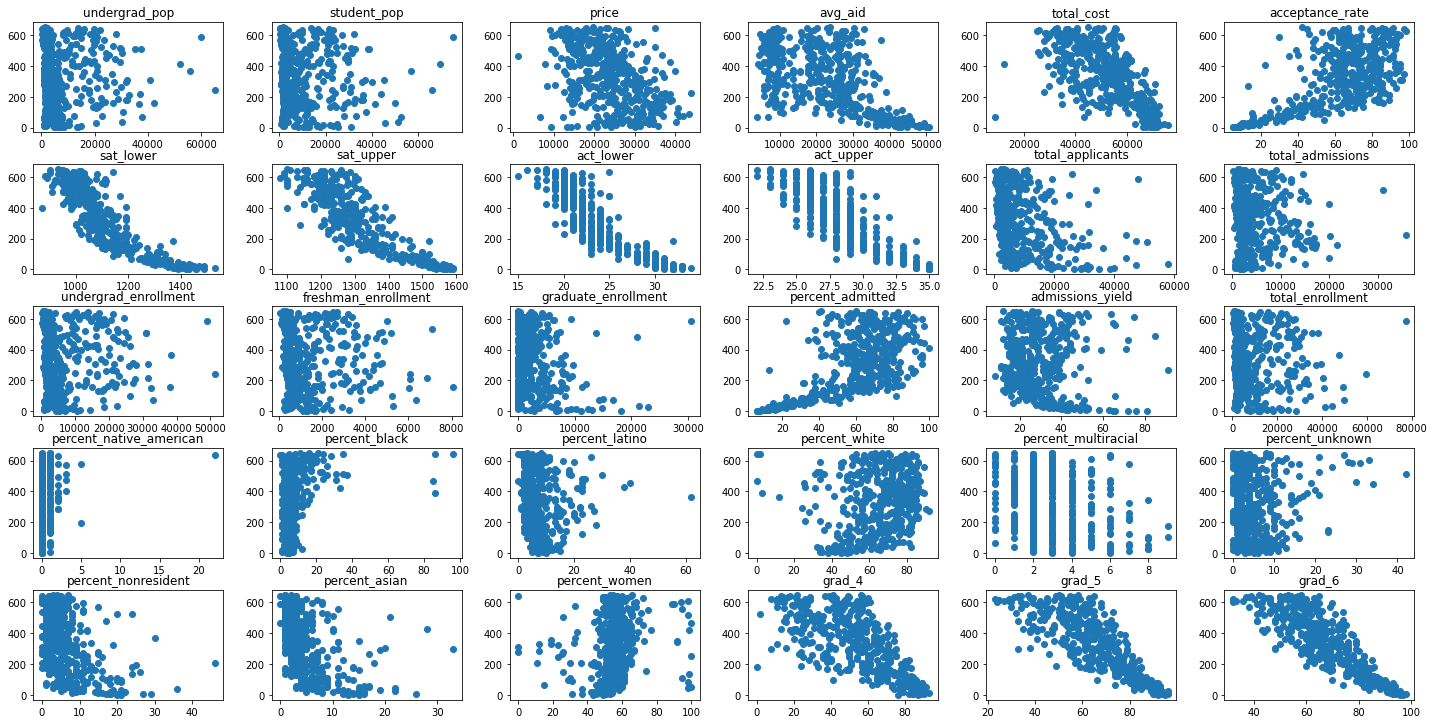

In [23]:
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots(5,6)
fig.tight_layout()

cols = final.columns[5:].to_numpy().reshape((5,6))

for i, group in enumerate(cols):
    for j, name in enumerate(group):
        ax[i][j].scatter(final[name], final['rank'])
        ax[i][j].set_title(name)

# Analysis

For the upcoming analysis, we further transformed our features for the inferential and predictive models that we are going to use (t-test, SVC, Linear Regression). We decided to stick with total cost, ACT and SAT scores, public/private standing, and state to for finding the best predictive model. For the T-test, we will be comparing proportions for each ethnic group, with each ranking group (as we will be transforming the ranks into smaller groups down below)

### Transformations

For preprocessing for the model generation, we will transform state into an ordinal variable. As such, we cross-referenced from external sources which states belong to certain regions. We created four regions, in order: North East, West, Midwest and South. We ordered these supposed nominal values since we found a strong association during EDA with regions affecting rankings in such a way that North East colleges rank better on average than Western ones, which also rank better than Midwest universities, and so on.

In [24]:
def convert_state(x):
    West = ['WA', 'OR', 'ID', 'MT', 'WY', 'CA', 'UT', 'AZ', 'CO', 'NM']
    Mid_West = ['ND', 'SD', 'MN', 'MI', 'NE', 'IA', 'IL', 'OH', 'KS', 'MO', 'IN', 'WI']
    South = ['TX', 'OK', 'AR', 'LA', 'MS', 'AL', 'GA', 'TN', 'SC', 'NC', 'VA', 'KY', 'WV', 'MD', 'DE', 'DC', 'FL']
    North_East = ['PA', 'NJ', 'CT', 'RI', 'MA', 'NY', 'VT', 'NH', 'ME']
    if x in West:
        return 2
    elif x in Mid_West:
        return 3

    elif x in South:
        return 4 

    else:
        return 1

We also transformed the SAT and ACT scores, calling them sat and act middle since it is the average of the upper and lower bounds of each respective test.

In [25]:
final['act_middle'] = final[['act_upper','act_lower']].mean(axis=1)
final['sat_middle'] = final[['sat_upper','sat_lower']].mean(axis=1)

final['state'] = final['state'].apply(convert_state)

### R correlation

To quantify the associations found during EDA, we generated a correlation value for each quantitative column and rank. Our thoughts were confirmed: the columns total cost, ACT and SAT scores, public/private standing, state and graduation rate do in fact affect ranking the most. Once again, they are the most appropriate values to use for our models

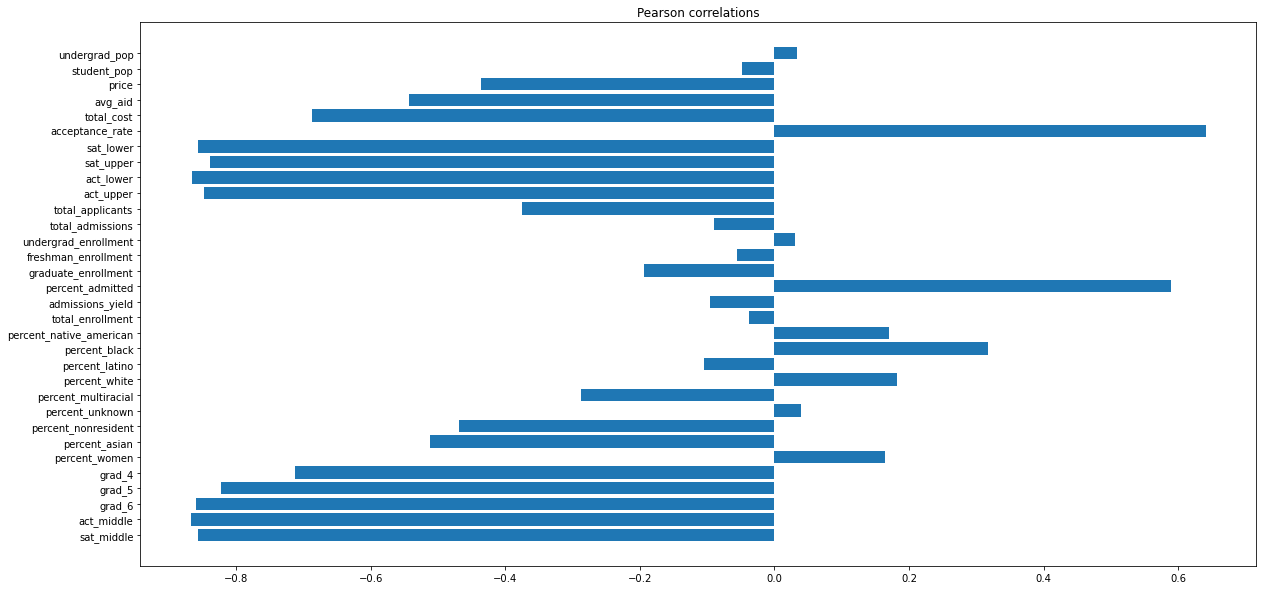

In [26]:
dct = {}
for i in final.columns[5:]:
    temp = final[['rank', i]].dropna()
    dct[i] = stats.pearsonr(temp['rank'], temp[i])[0]
plt.barh(list(dct.keys())[::-1],list(dct.values())[::-1])
plt.title('Pearson correlations')
plt.show()

## Models 

Firstly, we generated a test and train dataset using the function below. 

We created two pipelines: One for linear regression and another one for SVC. 

For the linear regression, we one-hot encoded the public/private column, and used the four other features (sat_middle, act_middle, total_cost, state) as is. The relatively high score and coefficients can seen below.


For the SVC, we one-hot encoded the public/private column, and used the four other features (sat_middle, act_middle, total_cost, state) as is. However, we transformed the rank to fit into quartiles (0-24 percentile, 25-49 percentile, 50-74 percentile, 75-100 percentile). The classification report below shows a pretty balanced precision and recall proportion (decent f1 score) and average accuracy.

In [27]:
def generate_test_train():
    copy = final.copy()
    copy = copy[['sat_middle', 'act_middle', 'total_cost', 'state', 'rank', 'public_private']].dropna()
    features = copy[['sat_middle', 'act_middle', 'total_cost', 'state', 'public_private']]
    target = copy['rank']
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, shuffle=True, random_state= 5)
    return x_train, x_test, y_train, y_test

In [28]:
## Linear regression with rank un-transformed

x_train, x_test, y_train, y_test = generate_test_train()

none = FunctionTransformer(lambda a: a)
onehot = OneHotEncoder(drop='first')

none_feat = ['sat_middle', 'act_middle', 'total_cost', 'state']
hot_feat = ['public_private']

ct = ColumnTransformer([('hot', onehot, hot_feat),
                        ('none', none, none_feat)])

pl = Pipeline([('col-trans', ct), ('lin-reg', LinearRegression())])
pl.fit(x_train, y_train)

pl.score(x_test, y_test)

0.7570722709106438

In [29]:
pl.named_steps['lin-reg'].coef_

array([-7.05059963e+01, -3.05505248e-01, -2.97368522e+01, -3.80498934e-03,
        7.14229880e+00])

***

In [30]:
def convert_rank(x):
    if x <= 162:
        return 1 
        return '0-24 percentile' # 0-24 percentile
    elif x <= 324:
        return 2
        return '25-49 percentile' # 25-49 percentile
    elif x <= 486:
        return 3 # 50-74 percentile
        return '50-74 percentile'
    else:
        return 4 # 75-100 percentile


In [31]:
## SVC classification with mapped ranks 

final['rank'] = final['rank'].apply(convert_rank)

x_train, x_test, y_train, y_test = generate_test_train()

none = FunctionTransformer(lambda a: a)
onehot = OneHotEncoder(drop='first')

none_feat = ['sat_middle', 'act_middle', 'total_cost']
hot_feat = ['public_private', 'state']
ct = ColumnTransformer([('hot', onehot, hot_feat),
                        ('none', none, none_feat)])

pl = Pipeline([('col-trans', ct), ('svc', SVC())])
pl.fit(x_train, y_train)

print(classification_report(y_test,pl.predict(x_test)))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        24
           2       0.67      0.43      0.53        23
           3       0.21      0.40      0.27        15
           4       0.58      0.47      0.52        30

    accuracy                           0.54        92
   macro avg       0.57      0.53      0.54        92
weighted avg       0.61      0.54      0.56        92



## T-Test

This plot shows the percentage means for each ethnicity by rank group, showing clear associations within each ethnic group

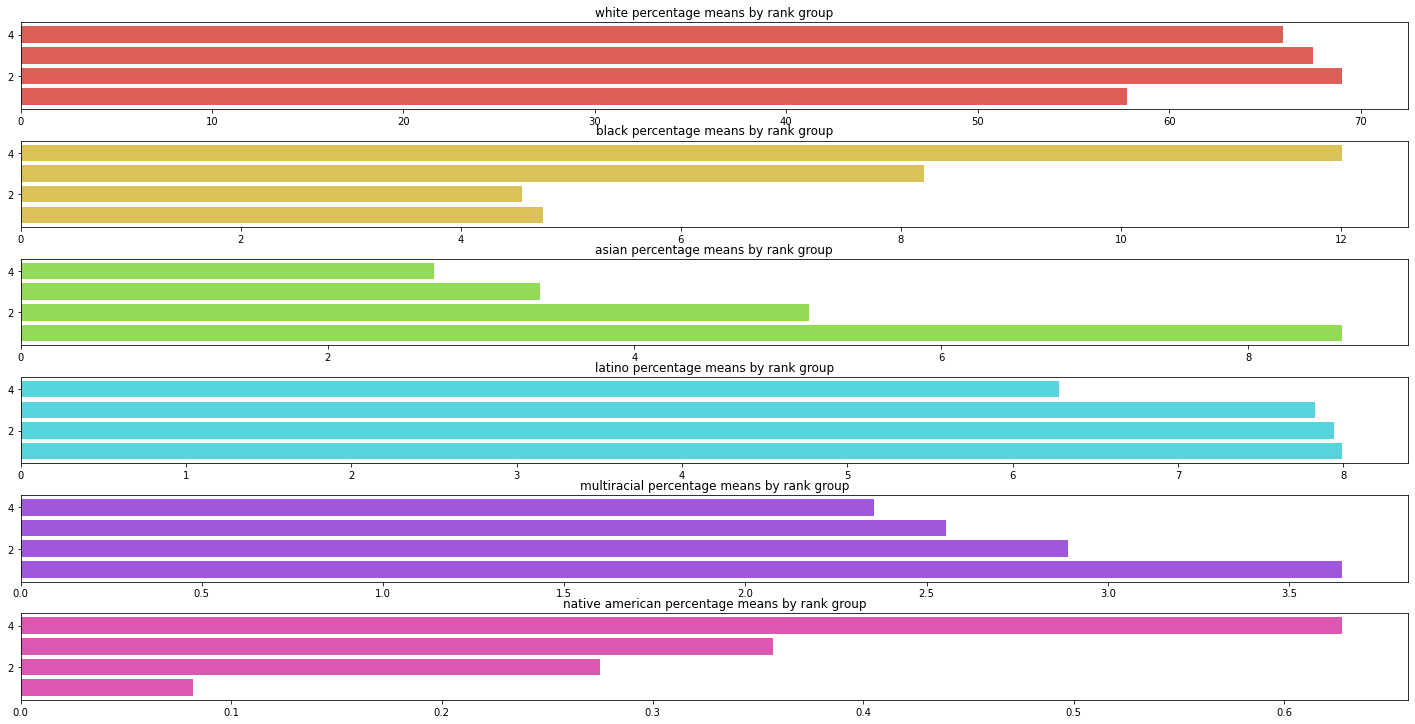

In [32]:
cols = ['percent_white', 'percent_black', 'percent_asian','percent_latino', 'percent_multiracial','percent_native_american']
crayon = ['#DB5F57', '#DBC257', '#91DB57', '#57D3DB', '#A157DB', '#DB57B2']
plt.rcParams["figure.figsize"] = (20, 10)
fig, ax = plt.subplots(len(cols),1)
fig.tight_layout()
for i, j in enumerate(cols):
    dat_ser = final.groupby('rank')[j].mean()
    ax[i].barh(dat_ser.index[::-1], dat_ser[::-1], color = crayon[i])
    ax[i].set_title(' '.join(j.split('_')[1:]) + ' percentage means by rank group')

We performed a t-test to check bias within the university rankings. To check this, we calculated a one sided t-test whether lower ranking schools (4 corresponding to 75-100 percentile) have lower proportion means for each ethnic group compared to higher ranking colleges (1 corresponding to 0-24 percentile). Our null hypothesis is that the ethnic proportion means have no difference between the high and low ranking colleges. The p-values corresponding to each ethnic group can be seen below. The signifance rate for this test is 0.05,

In [33]:
# null: same
# alt: hi_rank < low_rank (1-sided)

t_test_dct = {}
cols = ['percent_white', 'percent_black', 'percent_asian','percent_latino', 'percent_multiracial','percent_native_american']
for i, j in enumerate(cols):
    hi_rank = final.loc[final['rank']==1, j].dropna()
    low_rank = final.loc[final['rank']==4, j].dropna()
    val = stats.ttest_ind(hi_rank,low_rank)[1]
    if np.mean(hi_rank) < np.mean(low_rank):
        pval = val/2.
    else:
        pval = 1.0 - val/2.
    t_test_dct[j] = pval
t_test_dct

{'percent_white': 1.9953691464442687e-05,
 'percent_black': 3.045210662708338e-08,
 'percent_asian': 1.0,
 'percent_latino': 0.9978657836108155,
 'percent_multiracial': 0.9999999937693776,
 'percent_native_american': 0.005199718857786567}

The model results will be discussed in the conclusion 

# Ethics and Privacy

Regarding the data utilized in our analysis, both America's Top College Rankings 2019 (Forbes) and College Admissions datasets are obtained from Kaggle; both datasets are public and offer the users to copy, modify and perform analysis. The data presented in the America's Top College Rankings 2019 dataset was collected by Forbes, which according to their methodology, includes results from student surveys. However, this information was used to calculate the university’s overall student satisfaction rate, therefore no personally identifying information of any one student was presented. Forbes’s university ranking is considered highly reputable, therefore, we believe our dataset is reliable and is unlikely to be misrepresented.  

An ethical concern that occured during our analysis is using SAT scores to analyze college rankings. Schools with higher rankings generally admit students with higher SAT scores; however, SAT scores have long been concerned with the problem of being unfavorable to certain racial and economic groups. Although the causation has not been established, higher SAT scores have been found to be associated with students from higher income families, or parents with higher education backgrounds. With that being said, whether SAT scores should be considered a valid measure of a school’s ranking can be questionable. 

Another concern with our report is the fact that most highest ranking universities are private schools with higher tuition fees. University ranking lists are often consulted by students when choosing universities, with the majority of top universities being expensive private institutions, these ranking lists could potentially contribute to the myth of education provided by public institutions being less adequate or valuable compared to the selective and expensive private institutions. This could result in public institutions that offer quality education and opportunities being underrepresented. 

While recognizing the data could potentially be biased in some way, we made sure to conduct our project in a way that does not intentionally cause harm to others. We try our best to consider any biases and discrimination in the data. Any data that is collected is  public and free to use. We also ensure that our data takes the privacy of others into consideration and that we do not leak information that can pinpoint specific individuals.


# Conclusion and Discussion

Our project sought out to investigate the thousands of universities in the United States and the many factors included when determining their ranking. Originally, we used two different datasets and inner merged them to better work together. The first dataset was a ranking dataset of universities from 2019. The other dataset was a college admissions dataset. With the inner merge, it yielded 442 observations of universities which we determined to be enough to work with. With our new merged dataset containing information on private vs public schools, location, tuition, test scores, population, and demographics, we hoped to determine which attributes have greater weights in the ranking process and how a school’s demographic affects its ranking. 

After cleaning the merged dataset, our analysis focused on the following features: Frequency of states, proportion of private vs public schools, total tuition cost, population size, undergraduate population size, ACT and SAT scores, and demographics. For each feature, we determined how to best visualize the results in order to make a conclusion. 

#### EDA
From our EDA, we determined that the top ranked universities are located in New York, Pennsylvania, and California (in that order). Additionally, the proportion of private schools outnumbers the proportion of public schools in total and among the top 25 colleges, all are private universities. When looking at the tuition cost, our scatter plot clearly showed that higher ranking schools tended to be more expensive than the lower ranked schools. We then plotted the population of universities against their rank, where we did not see a strong correlation. And when plotting the undergraduate population density, we could see that most schools tend to have an undergraduate size of around 10000 students. Similarly to the tuition cost, ACT and SAT scores followed the trend of higher ranked schools having higher test scores. 


Lastly, we wanted to get a better understanding of the diversity/demographics of university populations along with their ranking. In order to do this, we used a pipeline to build a Linear Regression model and then created scatter plots. As seen in the plots above, White percentage was most scattered, Black percentage was less dense at higher ranked schools, Asian percentage was higher dense at higher ranked schools, Latino percentage was scattered leaning towards lower ranked schools, multiracial percentage was more dense at higher ranked schools, and Native American percentage was lower dense at higher ranked schools. From our t-test, Asian, Latino, and Multiracial demographics showed that high rank percentages were less than low rank percentages. 


#### T-test
From there, we ran a T-Test and ultimately determined the p-value of the impact of demographics in higher ranked vs lower ranked universities. We found that only white, black populations yielded significant results, where the null hypothesis is rejected. For the other groups such as Asian, Hispanic and Native American, the effect might even be reverse as shown by the graph generated in the T-test section. Judging from said graph, it showed that for those groups, the percentages have actually decreased among lower ranking colleges. Regardless, while this one sided t-test shows us a possible bias within the ranking system, we cannot say for sure, especially because this dataset has only incomplete information about the top 650 schools.

#### Model 
We found that the best features highly associated with ranking are state, SAT scores, ACT scores, public/private standing, total cost and graduation rate as they showed some of the highest correlation values. However, we chose not to use graduation rate as it caused dependence among our features. 

We decided to generate two models: A linear regression model and a SVC model. the results show at first glance a better perfoming linear model compared to the SVC model. But at close examination, the SVC is better because the linear regression model is not an appropriate model. This is becuase the linear model extrapolated and resulted in negative predictions, which did not make any sense since rank cannot be negative. As such, SVC while perfoming slightly worse, is the more appropriate model

#### Limitations
Some potential limitations in our dataset include the merging of the two datasets and our data cleaning process. When merging our datasets, we had to remove some rows, completely getting rid of university statistics. Additionally, we also considered the racial biases of the report and how they could alter the results. For example, standardized testing like the SAT have had problems with being biased to certain racial groups. However, we decided to continue to use it in our analysis to show a trend we found to be similar in comparison to other features. Despite the data limitations, we sought out to show the existing racial disparity in higher education and admission requirements of elite universities. As seen with our analysis, prestigious universities are more expensive and require higher test scores, as well as are less likely to favor marginalized groups than non-marginalized groups. 


# Team Contributions

**Frans Timothy Juacalla**: code for EDA, Models, T-test, Data Cleaning, Analysis, Transformations, Setup, video script   
**Ning Chen**: Writing, Ethics, Overview, Video script, Video presentation  
**Marco Morocho**: Conclusion, dataset finding, other edits, video script  
**Clarissa Elbo**: Video, Video Script, Video presentation, cell explanations, notebook formatting    